# Лабораторная работа № 1.2
## Исследование эффекта Комптона
С помощью сцинтилляционного спектрометра исследуется энергитический спектр $\gamma$-квантов, рассеянных на графите. Определяется энергия рассеянных $\gamma$-квантов в зависимости от угла рассеяния, а также энергия покоя частиц, на которых проходит комптоновское рассеяние.

In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.interpolate as scpint

Подгрузим данные

In [2]:
data = pd.read_csv("data.csv")
data

,"$\theta$, °",Channel,"Time, s",Particles,"I, 1/s"
0,0,874,123,1022286,8311.3
1,10,870,83,637287,7678.2
2,20,793,144,109962,722.0
3,30,749,102,55650,483.9
4,40,694,144,58260,404.6
5,50,589,160,50154,313.5
6,60,520,215,60058,279.3
7,70,466,223,57381,257.3
8,80,415,204,50305,246.6
9,90,380,200,47392,237.0


Построим зависимость $\frac{1}{N(\theta)} = A(1-cos(\theta))+\frac{1}{N(0)}$ (*)

Построим столбец $x = 1-cos(\theta)$
Не будем забывать также, что точность определения положения фотопика составляет примерно 1%

In [3]:
varx = np.round(1 - np.cos(np.array(data.values.T[0] * ((2*np.pi)/(360)))),2)
varx

array([ 0.  ,  0.02,  0.06,  0.13,  0.23,  0.36,  0.5 ,  0.66,  0.83,
        1.  ,  1.17,  1.34,  1.5 ])

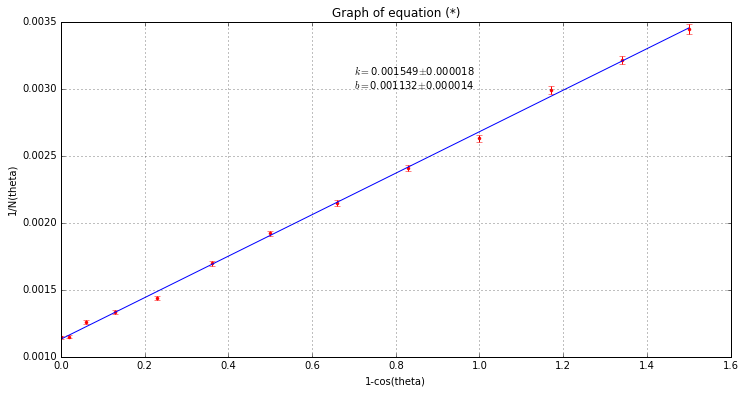

In [4]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

x = varx
y = 1/data.values.T[1]
yerr = y*0.01
coef,cov = np.polyfit(x, y, 1, cov=True)
func = np.poly1d(coef)
kerr, berr = np.sqrt(np.diag(cov))[0], np.sqrt(np.diag(cov))[1]
k,b = coef[0], coef[1]

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = func(x_new)

plt.xlabel('1-cos(theta)')
plt.ylabel('1/N(theta)')
plt.title("Graph of equation (*)")
plt.grid(True)


plt.errorbar(x, y, yerr=yerr, fmt='k.',  color='r')
plt.plot(x_new, y_new, 'k',  color='b')
plt.text(0.7,0.0030,r'$k=$%f$\pm$%f'%(k,kerr)+'\n'+r'$b=$%f$\pm$%f'%(b,berr))
plt.show()

Получаем, что 

In [9]:
N90 = 1/func(1.0)
N90err = N90 * np.sqrt(kerr**2 + berr**2)/(k-b)
N0 = 1/b
N0err = N0 * (berr/b)
print "N(0)= " + str(round(N0,5)) + " ± " + str(round(N0err,5))
print "N(90)= " + str(round(N90,5)) + " ± " + str(round(N90err, 5))

N(0)= 883.4451 ± 10.85456
N(90)= 373.02112 ± 20.16491


Для начала, предположим, что рассеяние происходит на покоящихся электронаъ, т.е. $mc^2=511.8$кэВ. Тогда получим энергию $\gamma$-лучей, испускаемых источником.

In [14]:
Ee = 8.2e-14 / (1.602176e-19) #электронвольт
Egamma = Ee * ((N0-N90)/N90)
Egammaerr = Egamma*(np.sqrt((np.sqrt(N0err**2 + N90err**2)/(N0-N90))**2 + (N90err/N90)**2))
print "Egamma = " + str(round(Egamma,2)) + " ± " + str(round(Egammaerr,2)) + " эВ"
print "Относительная погрешность = " + str(round(Egammaerr/Egamma,5)*100) + " %"

Egamma = 700327.65 ± 49199.1 эВ
Относительная погрешность = 7.025 %


Ожидаемый результат был 662 кэВ, а мы получили 700 кэВ, это может быть связанно с неточностью выбора угла, недостаточной чувствительности оборудования (на каждое преобразование затрачивается около 20 мкс, в течение этого времени система "не чувствует" приходящие от ФЭУ импульсы), ...

Теперь, будем считать, что $E_{\gamma}= 662$кэВ, тогда определим энергию покоя частицы на которой происходит комптоновское рассеяние.

In [16]:
Ex = 662e03 * (N90/(N0-N90))
Exerr = Ex * (np.sqrt((np.sqrt(N0err**2 + N90err**2)/(N0-N90))**2 + (N90err/N90)**2))
print "Eпокоя= " + str(round(Ex,2)) + " ± " +  str(round(Exerr,2)) 
print "Относительная погрешность = " + str(round(Exerr/Ex,5)*100) + " %"

Eпокоя= 483793.86 ± 33987.27
Относительная погрешность = 7.025 %
